In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('hotel_bookings.csv')

In [3]:
data.keys()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

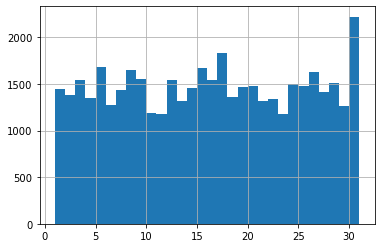

In [4]:
data[data.is_canceled == 1].arrival_date_day_of_month.hist(bins = 30)

In [5]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
data_cln = data.fillna({'children': 0.0, 'country': 'Unknown', 'agent':0, 'company': 0})

In [7]:
data_cln.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [8]:
data_cln.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [9]:
data_cln['meal'].replace('Undefined', 'SC', inplace = True)

In [10]:
data_cln.meal.unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [11]:
data_cln.shape

(119390, 32)

In [12]:
data_cln.loc[data_cln.adults == 0][['children', 'babies']]

,children,babies
2224,0.0,0
2409,0.0,0
3181,0.0,0
3684,0.0,0
3708,0.0,0
...,...,...
117204,2.0,0
117274,2.0,0
117303,2.0,0
117453,2.0,0


In [13]:
data_cln.index[list(data_cln.loc[data_cln.adults == 0].index)]

Int64Index([  2224,   2409,   3181,   3684,   3708,   4127,   9376,  31765,
             32029,  32827,
            ...
            116558, 116832, 117087, 117128, 117130, 117204, 117274, 117303,
            117453, 118200],
           dtype='int64', length=403)

In [14]:
data_cln.loc[(data_cln.adults + data_cln.children + data_cln.babies) == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [ ]:
data_cln.head()

In [15]:
country_data = pd.DataFrame(data_cln.country.value_counts())

In [16]:
country_data

,country
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
...,...
NAM,1
VGB,1
SLE,1
PYF,1


In [17]:
data_cln.country

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [18]:
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)

In [19]:
country_data['country'] = country_data.index

In [20]:
country_data

,Number of Guests,Guests in %,country
PRT,48590,40.70,PRT
GBR,12129,10.16,GBR
FRA,10415,8.72,FRA
ESP,8568,7.18,ESP
DEU,7287,6.10,DEU
...,...,...,...
NAM,1,0.00,NAM
VGB,1,0.00,VGB
SLE,1,0.00,SLE
PYF,1,0.00,PYF


In [21]:
data_cln[data_cln['is_canceled'] == 1].adr

8          82.0
9         105.5
10        123.0
27        107.0
32        108.3
          ...  
110280      0.0
111355     65.0
111924     65.0
111925     65.0
117295     65.0
Name: adr, Length: 44224, dtype: float64

In [22]:
data_cln.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [23]:
data.corr().abs()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,0.006130,0.001791,0.024765,0.060017,0.005048,0.032491,0.084793,0.110133,0.057358,0.144381,0.083114,0.020642,0.054186,0.047557,0.195498,0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,0.037622,0.020915,0.124410,0.086042,0.073548,0.000149,0.069741,0.151464,0.170084,0.063077,0.116451,0.095712
arrival_date_year,0.016660,0.040142,1.000000,0.540561,0.000221,0.021497,0.030883,0.029635,0.054624,0.013192,0.010341,0.119822,0.029218,0.030872,0.063457,0.259095,0.056497,0.197580,0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,0.030131,0.035501,0.020904,0.005508,0.031201,0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,0.006130,0.002268,0.000221,0.066809,1.000000,0.016354,0.028174,0.001566,0.014544,0.000230,0.006145,0.027011,0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,0.001791,0.085671,0.021497,0.018208,0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,0.087239,0.012775,0.042715,0.063281,0.140739,0.066749,0.054151,0.049342,0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,0.097245,0.013992,0.048743,0.096209,0.182382,0.182211,0.002020,0.065237,0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,0.146426,0.006738,0.107983,0.051673,0.035594,0.207793,0.008283,0.230641,0.014785,0.122884
children,0.005048,0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,0.032859,0.024730,0.021072,0.048949,0.041066,0.030931,0.033273,0.324854,0.056253,0.081745
babies,0.032491,0.020915,0.013192,0.010395,0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,0.008943,0.007501,0.006550,0.083440,0.036184,0.019206,0.010621,0.029186,0.037383,0.097889


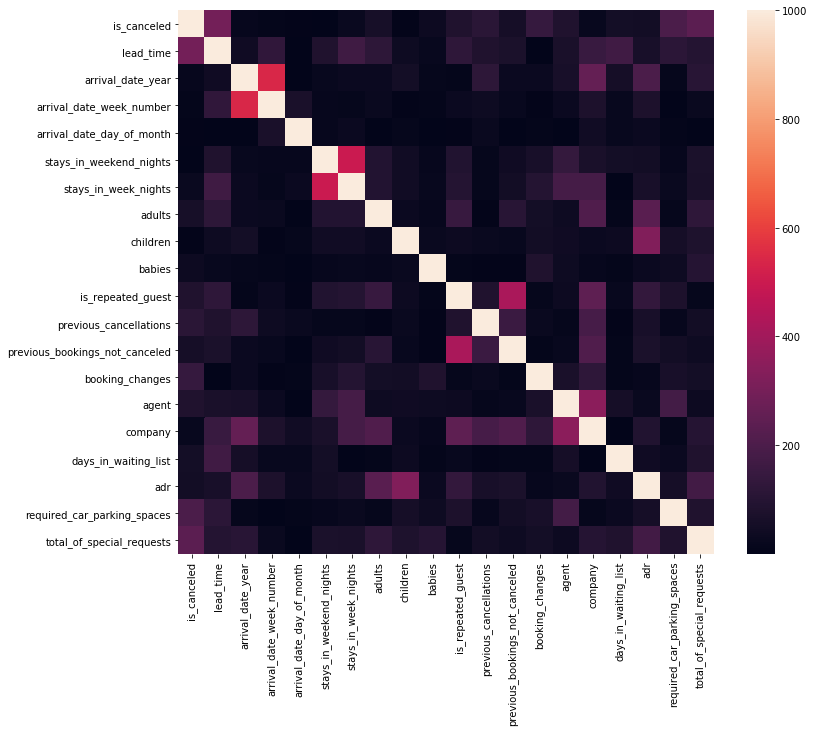

In [24]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(ax = ax, data = data.corr().abs() * 1000)

In [25]:
data.groupby("is_canceled")["reservation_status"].value_counts()

is_canceled  reservation_status
0            Check-Out             75166
1            Canceled              43017
             No-Show                1207
Name: reservation_status, dtype: int64

In [26]:
# !pip3 install xgboost

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [27]:
# !pip3 install eli5

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [28]:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import eli5 # Feature importance evaluation

/home/pangaofeng/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/pangaofeng/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [29]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

# Separate features and predicted value
features = num_features + cat_features
X = data_cln.drop(["is_canceled"], axis=1)[features]
y = data_cln["is_canceled"]

# preprocess numerical feats:
# for most num cols, except the dates, 0 is the most logical choice as fill value
# and here no dates are missing.
num_transformer = SimpleImputer(strategy="constant")

# Preprocessing for categorical features:
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical features:
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

In [30]:
X.shape

(119390, 24)

In [31]:
trans_data = preprocessor.fit_transform(X)

In [32]:
trans_data.shape

(119390, 64)

In [33]:
y.shape

(119390,)

In [34]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers, regularizers

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)


1 Physical GPUs, 1 Logical GPUs


In [35]:
# define models to test:
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]

# split data into 'kfolds' parts for cross validation,
# use shuffle to ensure random distribution of data:
kfolds = 10 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

# Preprocessing, fitting, making predictions and scoring for every model:
for name, model in base_models:
    # pack preprocessing of data and the model in a pipeline:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    # get cross validation score for each model:
    cv_results = cross_val_score(model_steps, 
                                 X, y, 
                                 cv=split,
                                 scoring="roc_auc",
                                 n_jobs=-1)
    # output:
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")
    
    #pipeline.fit(X_train, y_train)
    #preds = pipeline.predict(X_valid)
    #score = accuracy_score(y_valid, preds)
    #print(f"{name} accuracy_score: {round(score, 4)}")

DT_model cross validation accuarcy score: 0.8209 +/- 0.003 (std) min: 0.8159, max: 0.8258
RF_model cross validation accuarcy score: 0.9343 +/- 0.0017 (std) min: 0.9314, max: 0.9378
LR_model cross validation accuarcy score: 0.825 +/- 0.0056 (std) min: 0.8145, max: 0.8342
XGB_model cross validation accuarcy score: 0.9145 +/- 0.0028 (std) min: 0.91, max: 0.9182


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
for train_index, test_index in split.split(y):
    train_x = trans_data[train_index]
    train_y = y[train_index]
    
    test_x = trans_data[test_index]
    test_y = y[test_index]
    
    #model = LogisticRegression(random_state=42, n_jobs = -1)
    model = SVR()
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    

In [ ]:
pred_y

In [ ]:
np.unique(pred_y)

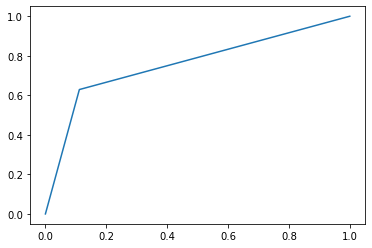

In [80]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(test_y, pred_y)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)

In [81]:
roc_auc

0.758810660313187

In [64]:
pred_y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [61]:
accuracy_score(test_y, pred_y)

0.8261998492336041

In [47]:
def test_model():
    inputs = keras.Input(shape=(64,), dtype = "float32")
#     x = layers.Bidirectional(layers.LSTM(256, return_sequences = True))(inputs)
#     #x = layers.Bidirectional(layers.LSTM(128, return_sequences = True))(x)
#     x = layers.Bidirectional(layers.LSTM(128, return_sequences = True))(x)
    
#     x = layers.Reshape((100, 256, 1))(x)

#     x = layers.Conv2D(256, (4,3), activation='relu',
#                      kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(x)
#     x = layers.MaxPooling2D()(x)
#     # x = layers.Dropout(.2)(x)
#     x = layers.Conv2D(128, 3, activation='relu',
#                      kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(x)
#     x = layers.MaxPooling2D()(x)
#     x = layers.Conv2D(64, 3, activation='relu',
#                      kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(x)
#     x = layers.MaxPooling2D()(x)
#     x = layers.Conv2D(32, 3, activation='relu',
#                       kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(x)
#     x = layers.Flatten()(x)
    x = layers.Dense(256)(inputs)
    x = layers.Dense(128)(x)
    x = layers.Dense(64)(x)
    x = layers.Dense(32)(x)
    x = layers.Dense(16)(x)
    outputs = layers.Dense(1, activation='sigmoid',
                    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))(x)
    model = keras.Model(inputs, outputs)
    model.summary()

    model.compile("adam", "binary_crossentropy", metrics=["accuracy", "AUC"])
    return model
    

In [48]:
model = test_model()
model.fit(trans_data, y, batch_size=32, epochs=3)

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_27 (Dense)             (None, 1)               

In [50]:
model.fit(trans_data, y, batch_size=32, epochs=30)

Epoch 1/30
3731/3731 [==============================] - 32s 9ms/step - loss: 0.4415 - accuracy: 0.7981 - auc: 0.8424
Epoch 2/30
3731/3731 [==============================] - 31s 8ms/step - loss: 0.4406 - accuracy: 0.8002 - auc: 0.8437
Epoch 3/30
3731/3731 [==============================] - 33s 9ms/step - loss: 0.4398 - accuracy: 0.7998 - auc: 0.8442
Epoch 4/30
3731/3731 [==============================] - 33s 9ms/step - loss: 0.4386 - accuracy: 0.8011 - auc: 0.8454
Epoch 5/30
3731/3731 [==============================] - 33s 9ms/step - loss: 0.4386 - accuracy: 0.8013 - auc: 0.8453
Epoch 6/30
3731/3731 [==============================] - 33s 9ms/step - loss: 0.4385 - accuracy: 0.8010 - auc: 0.8452
Epoch 7/30
3731/3731 [==============================] - 32s 9ms/step - loss: 0.4390 - accuracy: 0.8006 - auc: 0.8448
Epoch 8/30
3731/3731 [==============================] - 33s 9ms/step - loss: 0.4379 - accuracy: 0.8023 - auc: 0.8453
Epoch 9/30
3731/3731 [==============================] - 33s 9ms/

In [54]:
pred_y = model.predict(trans_data)

for i in np.arange(0, 1, 0.01):
    tmp_y = np.zeros(pred_y.shape)
    tmp_y[pred_y > i] = 1

    print(accuracy_score(y, tmp_y))

0.37041628277075134
0.4353714716475417
0.43728117932825195
0.4395510511768155
0.4422899740346763
0.4461847725940196
0.4511768154786833
0.4575760113912388
0.46540748806432697
0.47359075299438813
0.48360834240723677
0.49458078566044056
0.5088868414440071
0.5223804338721836
0.5363179495770165
0.549401122372058
0.565055699807354
0.5814724851327582
0.5985928469721082
0.6169612195326242
0.6344920010051093
0.6479269620571237
0.6625345506323813
0.6786162995225731
0.6924198006533211
0.7028310578775442
0.7160314934249099
0.7262752324315269
0.7360247926962057
0.7452801742189463
0.753069771337633
0.7605913393081498
0.7677108635564117
0.7755339643186197
0.7812547114498701
0.7861378674930899
0.790652483457576
0.7942289974034676
0.7987519892788341
0.8025881564620152
0.8051763129240305
0.8073121701985091
0.8084094145238294
0.8085099254543932
0.8090124801072116
0.8093893960968255
0.8087444509590418
0.8075969511684395
0.8055616048245247
0.8037942876287796
0.8013401457408493
0.7981824273389732
0.79558589

In [ ]:
# Enhanced RF model with the best parameters I found:
rf_model_enh = RandomForestClassifier(n_estimators=160,
                               max_features=0.4,
                               min_samples_split=2,
                               n_jobs=-1,
                               random_state=0)

split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model_enh)])
cv_results = cross_val_score(model_pipe, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
# output:
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"Enhanced RF model cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

In [ ]:
# fit model(pipeline) so values can be accessed:
model_pipe.fit(X,y)

# Names of all (encoded) features are needed.
# Get names of columns from One Hot Encoding:
onehot_columns = list(model_pipe.named_steps['preprocessor'].
                      named_transformers_['cat'].
                      named_steps['onehot'].
                      get_feature_names(input_features=cat_features))

# Add num_features for full list.
# Order must be as in definition of X, where num_features are first: 
feat_imp_list = num_features + onehot_columns

# show 10 most important features, provide names of features:
feat_imp_df = eli5.formatters.as_dataframe.explain_weights_df(
    model_pipe.named_steps['model'],
    feature_names=feat_imp_list)
feat_imp_df.head(10)